# Introduction to neural network classification with TensorFlow

In this notebook, we're going to learn how to write neural network for classification problems

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
  * Binary Classification
  * Multiclass Classification
  * Multilabel Classification



## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, Y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
# Check out the feature
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
Y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"XO" : X[:,0], "YO" : X[:,1], "label" : Y})
circles.head()

,XO,YO,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
circles["label"].value_counts()


label
1    500
0    500
Name: count, dtype: int64

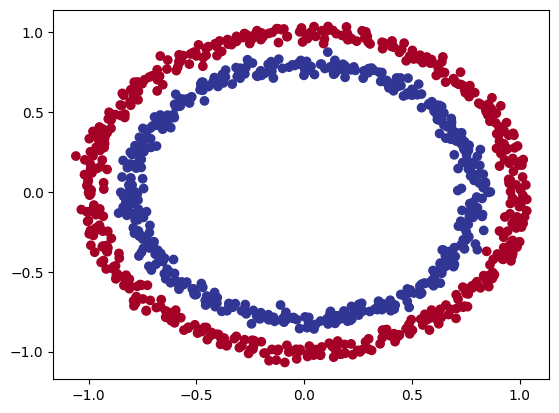

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu);


🛠️ Exercise: Before pushing forward, spend 10-minutes playing around with playground.tensorflow
networks. See what happens when you change different hyperparamters.


Input and Output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, Y.shape

((1000, 2), (1000,))

In [ ]:
# how many samples we're working
len(X), len(Y)

(1000, 1000)

In [ ]:
# view the first example of features and labels
X[0], Y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:

# 1. set random seed
import tensorflow as tf
tf.random.set_seed(42)

# 2. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 3. compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 4. Fit the model
model.fit(X, Y, epochs=5)



Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 4.8304 - accuracy: 0.4760
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 2.5898 - accuracy: 0.5170
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7257 - accuracy: 0.4780
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6977 - accuracy: 0.4530
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 0.6948 - accuracy: 0.4580


In [ ]:
# Let's try and improve our model by training for longer...
model.fit(X, Y, epochs=200, verbose=0)
model.evaluate(X, Y)

32/32 [==============================] - 1s 6ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things y=up a notch and add an extra layer



In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, Y, epochs=100, verbose=0)

In [ ]:
model_1.evaluate(X, Y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6936573386192322, 0.5]

In [ ]:
circles["label"].value_counts()


label
1    500
0    500
Name: count, dtype: int64

### Improving our model

Let's look into our bag of tricks to see how we can improve our models.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs(leave it training for longer).

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
)

# 3. fit the model
model_3.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 2.1714 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7288 - accuracy: 0.4700
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7019 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4670
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4870
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4950
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4520
Epoch 11/

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_3.evaluate(X, Y)

32/32 [==============================] - 1s 5ms/step - loss: 0.7010 - accuracy: 0.5080


[0.7009838819503784, 0.5080000162124634]

In [ ]:
model_1.evaluate(X, Y)


32/32 [==============================] - 0s 6ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6936573386192322, 0.5]

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_3.predict(X)

32/32 [==============================] - 0s 3ms/step


array([[0.47218832],
       [0.57701373],
       [0.5825416 ],
       [0.5838225 ],
       [0.4256044 ],
       [0.5890489 ],
       [0.5630147 ],
       [0.46579757],
       [0.47632632],
       [0.5842288 ],
       [0.5259706 ],
       [0.5232338 ],
       [0.57229084],
       [0.43900135],
       [0.43307543],
       [0.45207402],
       [0.55965656],
       [0.4562886 ],
       [0.5659277 ],
       [0.51359105],
       [0.49484867],
       [0.6059286 ],
       [0.4531345 ],
       [0.47611633],
       [0.6067643 ],
       [0.5929728 ],
       [0.55204546],
       [0.44334617],
       [0.44702235],
       [0.4364336 ],
       [0.4800998 ],
       [0.5899187 ],
       [0.56019956],
       [0.44054812],
       [0.45370087],
       [0.61213374],
       [0.5889841 ],
       [0.52404207],
       [0.44793874],
       [0.49799648],
       [0.5085704 ],
       [0.5439771 ],
       [0.52288693],
       [0.43741566],
       [0.53756934],
       [0.5573411 ],
       [0.43298727],
       [0.544

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, featurea (X) and labels (Y)
* Create a meshgrid of the different X values
* Make prediction across the meshgrid
* Plot the predictions as weel as line between zones (where each unique class falss)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create x value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multiclass
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

# Example usage:
# plot_decision_boundary(model=model_3, X=X, y=y)

313/313 [==============================] - 0s 1ms/step
Doing binary classification


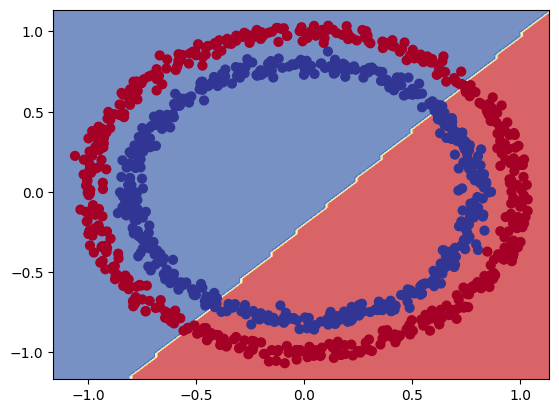

In [ ]:
# check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=Y)

In [ ]:
X_min, X_max = X[:, 0].min() - 0.1, X[:, 0 ].max() + 0.1
Y_min, Y_max = X[:, 1].min() - 0.1, X[:, 1 ].max() + 0.1

X_min, X_max, Y_min, Y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)